In [1]:
import sys
sys.path.append(r"C:\Users\conta\D\MTech\sem5\QML\project\qml_proj")

In [2]:
data_dir = r"C:\Users\conta\D\MTech\sem5\QML\project\notebooks\rice_UCI"

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from qiskit_algorithms.optimizers import COBYLA
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from TranspiledCircuit.TranspiledQNN import TranspiledQNN
from CustomQNN.Custom import CustomEstimatorQNN
import warnings
warnings.filterwarnings('ignore')


In [4]:
# api_token = r"your_api_key_here"
# service = QiskitRuntimeService(
#     channel= "ibm_quantum",
#     token= api_token
# )

# QiskitRuntimeService.save_account(channel= "ibm_quantum", token=api_token)

In [5]:
service = QiskitRuntimeService(channel="ibm_quantum")

In [6]:
backend = service.backend(name='ibmq_qasm_simulator')

In [7]:
X_scaled_path = os.path.join(data_dir, "rice_scaled.npy")
y_path = os.path.join(data_dir, "labels.npy")

In [8]:
def load_np_data(np_obj_path):
    assert os.path.exists(np_obj_path), "Path does not exists"
    with open(np_obj_path, "rb") as file:
        var = np.load(file, allow_pickle=True)
    return var

In [9]:
X_enc = load_np_data(X_scaled_path)
print(f"X_enc shape: {X_enc.shape}")

print()
Y = load_np_data(y_path)
print(f"Y shape: {Y.shape}")

X_enc shape: (3810, 7)

Y shape: (3810,)


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X_enc, Y, random_state=711)
X_train = X_train[:50]
Y_train = Y_train[:50]

X_test = X_test[:50]
Y_test = Y_test[:50]

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(50, 7)
(50,)
(50, 7)
(50,)


In [11]:
Y_train = np.where(Y_train==0, -1, 1)
Y_test = np.where(Y_test==0, -1, 1)

## Classification Using Custom EstimatorQNN

### Section 1 <br> In Below Section Ansatz is used with **Angle Encoding** and Repetation value of **2**

In [12]:
ANSATZ_NAME = "ansatz3"
ENCODING = ["angle", "angle", "zz"]
DEPTH = [2, 5, 5]

In [13]:
ip_dim = X_train.shape[1]
trans_crc = TranspiledQNN(ip_dim, ENCODING[0], ANSATZ_NAME, DEPTH[0], backend)
trans_crc_qc = trans_crc.get_circuit()
trans_layout = trans_crc.get_circuit_layout()

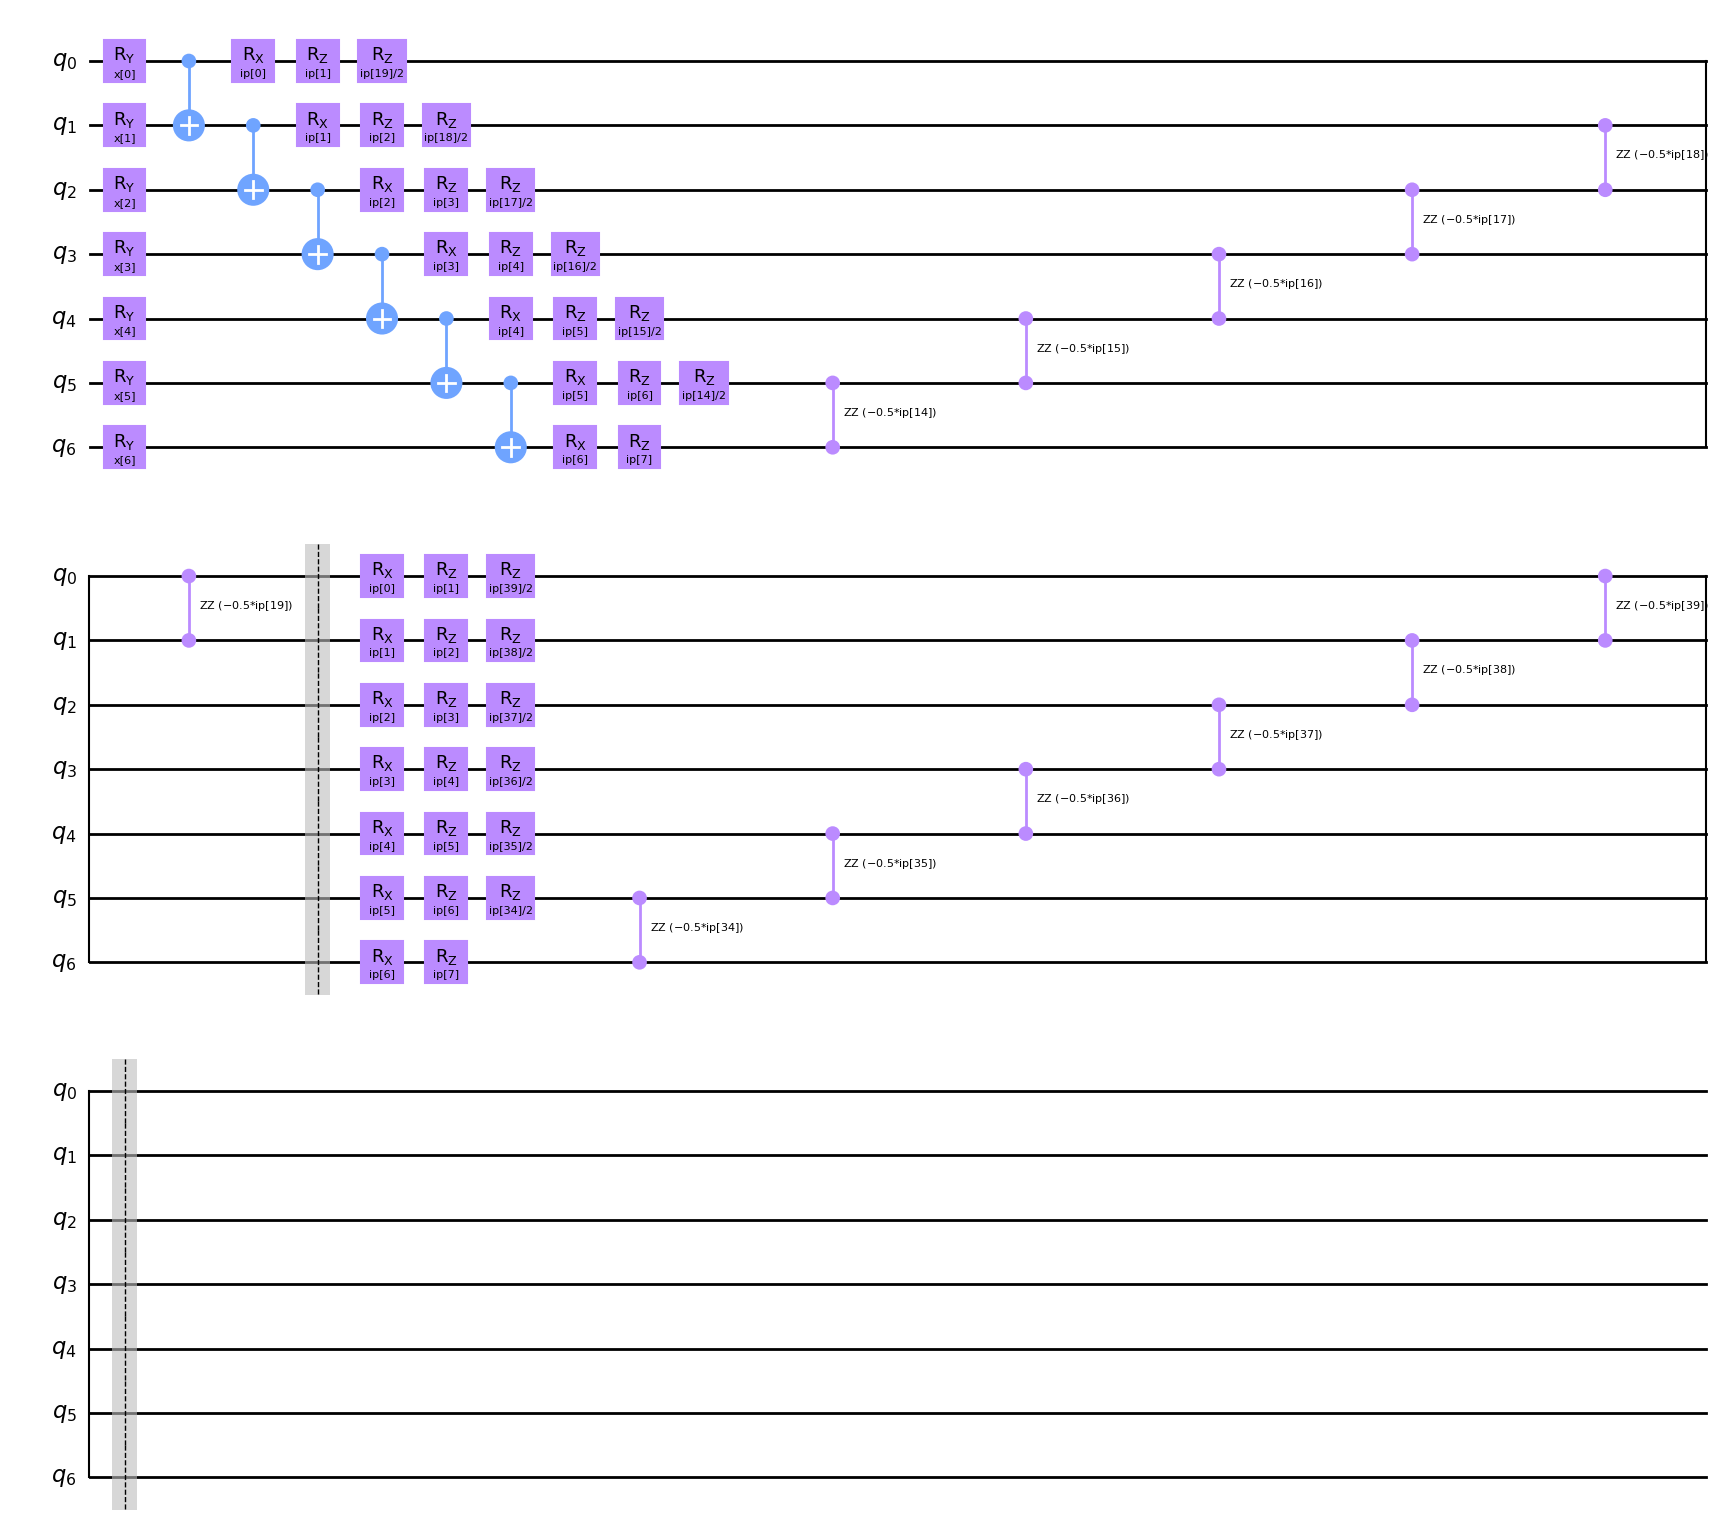

In [14]:
trans_crc_qc.draw("mpl", style="clifford")

In [15]:
cnt_wei_params = len(trans_crc_qc.weight_parameters)
estimator_qnn = CustomEstimatorQNN(trans_crc_qc, service, backend)

In [16]:
objective_func_vals = []

def saving_obj_vals(weights, obj_func_eval):
    objective_func_vals.append(obj_func_eval)
    

In [17]:
# construct neural network classifier
estimator_classifier = NeuralNetworkClassifier(
    estimator_qnn, 
    optimizer=COBYLA(maxiter=cnt_wei_params * 3), 
    callback=saving_obj_vals
)


In [18]:
# fit classifier to data
estimator_classifier.fit(X_train[:15], Y_train[:15])

# score classifier
test_score1 = estimator_classifier.score(X_test, Y_test)
print(f"Test score: {test_score1}")

Test score: 0.44


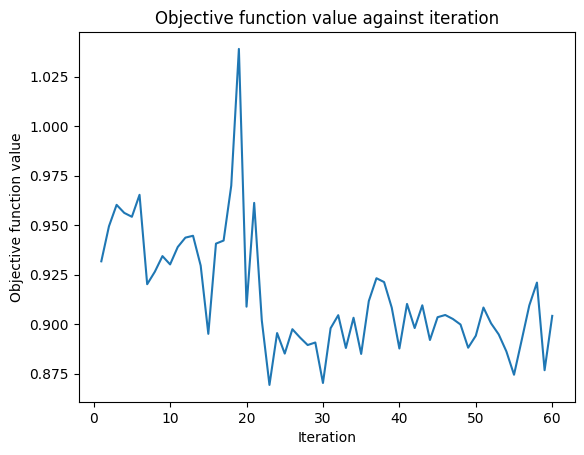

In [19]:
plt.plot(range(1, len(objective_func_vals) + 1), objective_func_vals)
plt.title("Objective function value against iteration")
plt.xlabel("Iteration")
plt.ylabel("Objective function value")
plt.show()

### Section 2 <br> In Below Section Ansatz is used with **Angle Encoding** and Repetation value of **5**

In [20]:
ip_dim = X_train.shape[1]
trans_crc = TranspiledQNN(ip_dim, ENCODING[1], ANSATZ_NAME, DEPTH[1], backend)
trans_crc_qc = trans_crc.get_circuit()
trans_layout = trans_crc.get_circuit_layout()

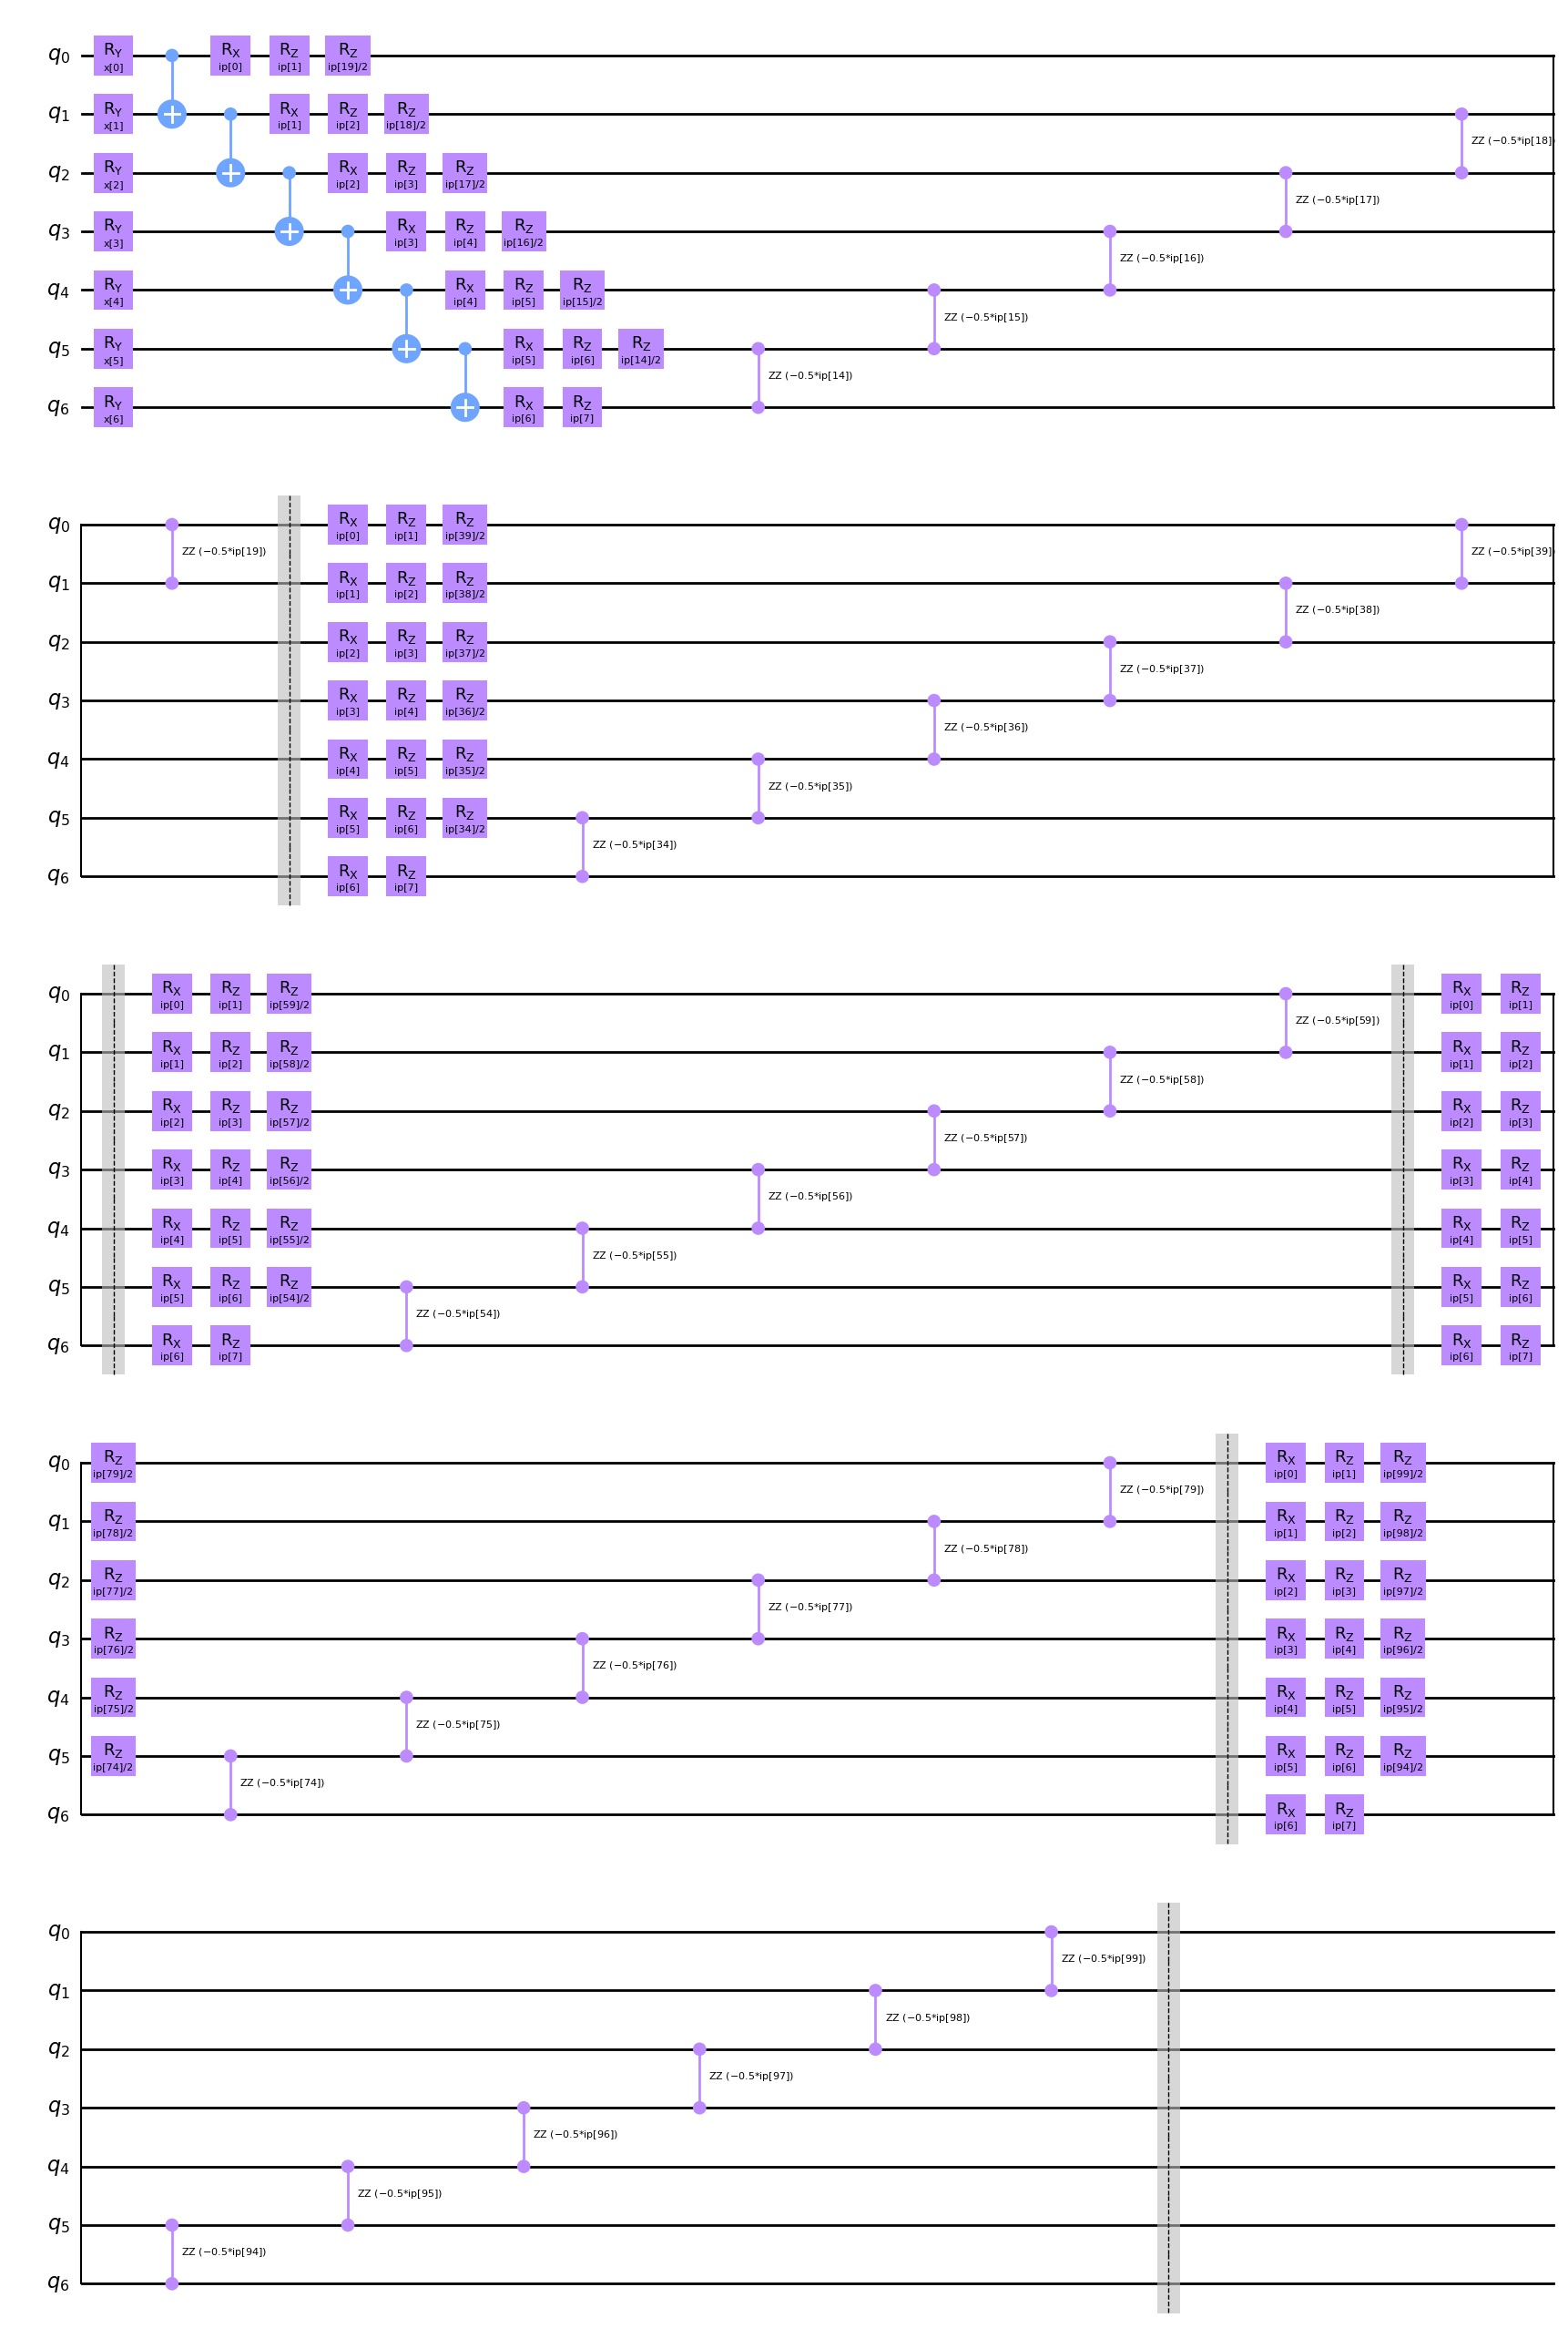

In [21]:
trans_crc_qc.draw("mpl", style="clifford")

In [22]:
objective_func_vals = []
cnt_wei_params = len(trans_crc_qc.weight_parameters)
estimator_qnn = CustomEstimatorQNN(trans_crc_qc, service, backend)

# construct neural network classifier
estimator_classifier = NeuralNetworkClassifier(
    estimator_qnn, 
    optimizer=COBYLA(maxiter=cnt_wei_params * 3), 
    callback=saving_obj_vals
)

In [23]:
# fit classifier to data
estimator_classifier.fit(X_train[:15], Y_train[:15])

# score classifier
test_score2 = estimator_classifier.score(X_test, Y_test)
print(f"Test score: {test_score2}")

Test score: 0.5


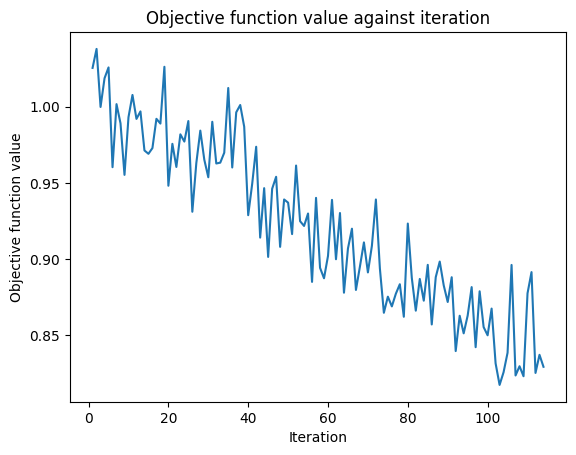

In [24]:
plt.plot(range(1, len(objective_func_vals) + 1), objective_func_vals)
plt.title("Objective function value against iteration")
plt.xlabel("Iteration")
plt.ylabel("Objective function value")
plt.show()

### Section 3 <br> In Below Section Ansatz is used with **ZZ Encoding** and Repetation value of **5**

In [25]:
ip_dim = X_train.shape[1]
trans_crc = TranspiledQNN(ip_dim, ENCODING[2], ANSATZ_NAME, DEPTH[2], backend)
trans_crc_qc = trans_crc.get_circuit()
trans_layout = trans_crc.get_circuit_layout()

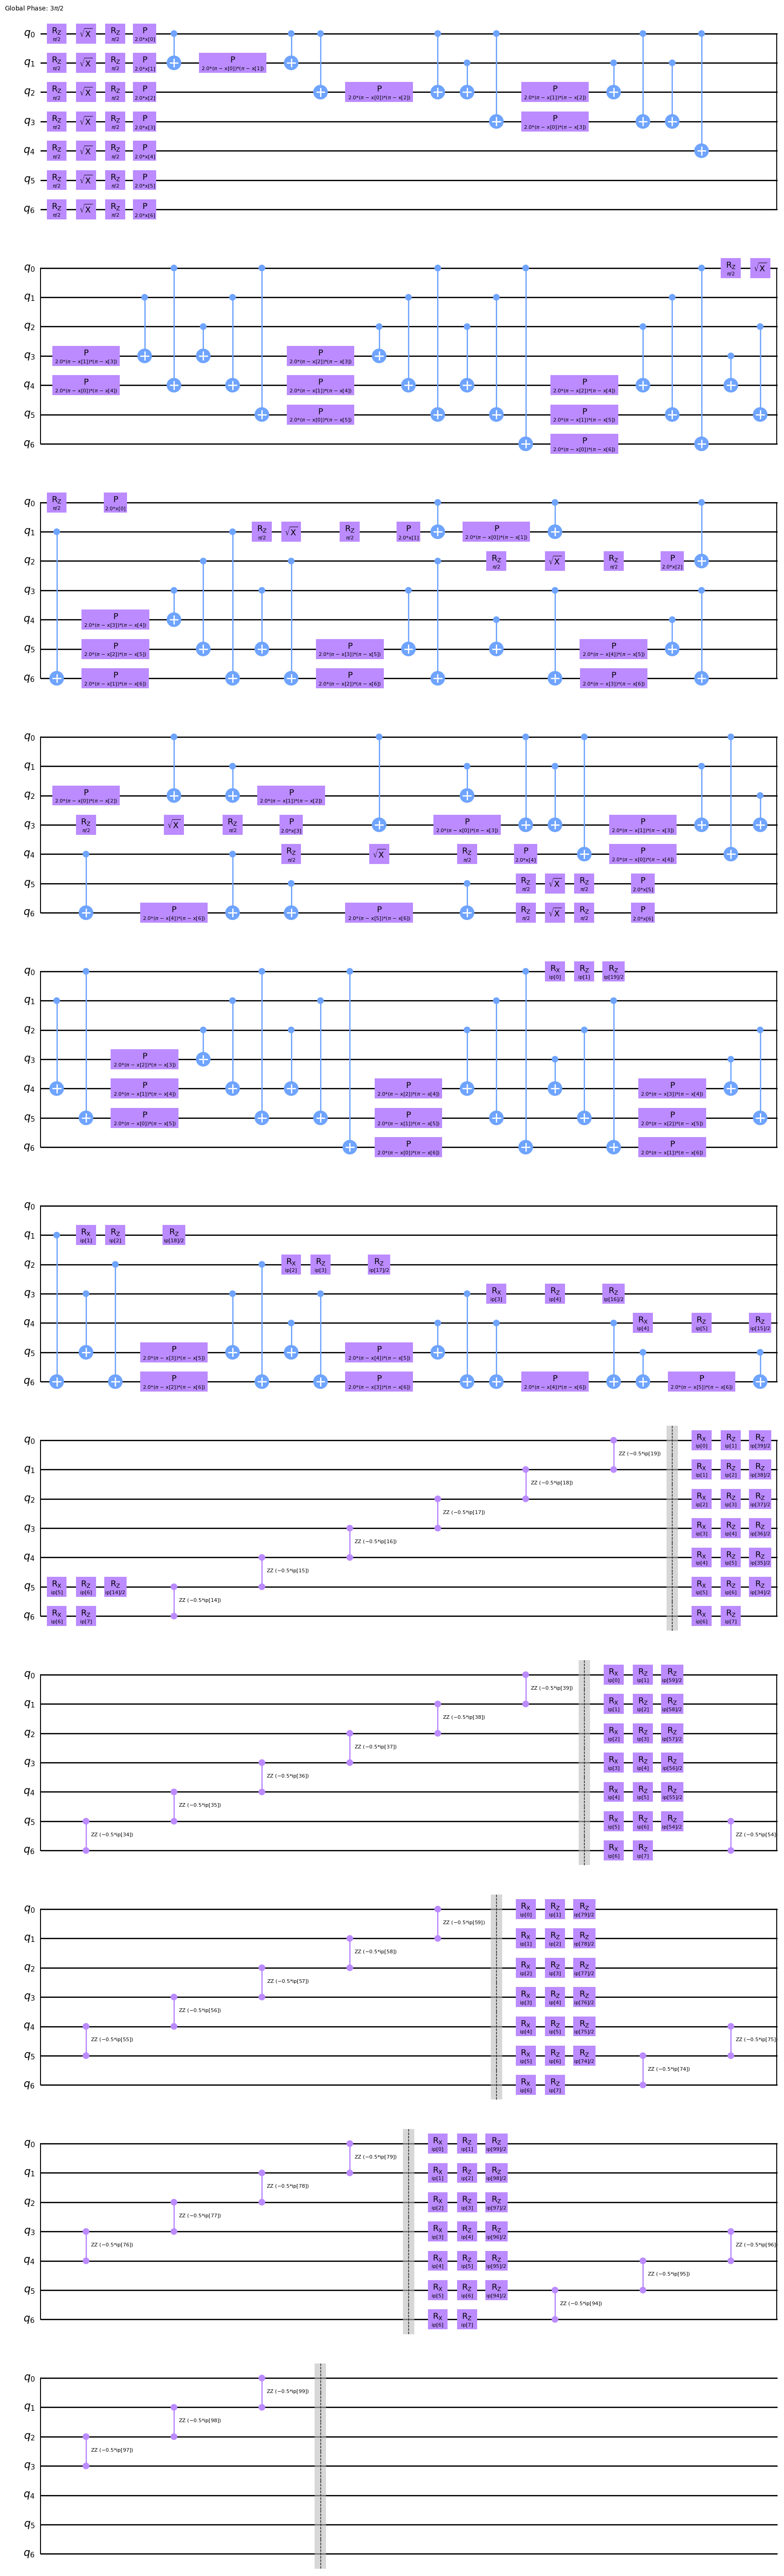

In [26]:
trans_crc_qc.draw("mpl", style="clifford")

In [27]:
objective_func_vals = []
cnt_wei_params = len(trans_crc_qc.weight_parameters)
estimator_qnn = CustomEstimatorQNN(trans_crc_qc, service, backend)

# construct neural network classifier
estimator_classifier = NeuralNetworkClassifier(
    estimator_qnn, 
    optimizer=COBYLA(maxiter=cnt_wei_params * 3), 
    callback=saving_obj_vals
)

In [28]:
# fit classifier to data
estimator_classifier.fit(X_train[:15], Y_train[:15])

# score classifier
test_score3 = estimator_classifier.score(X_test, Y_test)
print(f"Test score: {test_score3}")

In [ ]:
plt.plot(range(1, len(objective_func_vals) + 1), objective_func_vals)
plt.title("Objective function value against iteration")
plt.xlabel("Iteration")
plt.ylabel("Objective function value")
plt.show()

## Writing Rresults in .csv File

In [ ]:
import pandas as pd

ansatz_name = ANSATZ_NAME
result_path = r"C:\Users\conta\D\MTech\sem5\QML\project\qml_proj\results.csv"

data = {
    'Ansatz Name': [ansatz_name]*3, 
    'Encoding': ENCODING, 
    'Depth': DEPTH, 
    'test_score': [test_score1, test_score2, test_score3]
    }

df = pd.DataFrame(data)

if os.path.exists(result_path):
    df_existing = pd.read_csv(result_path)
else:
    df_existing = pd.DataFrame()


df_res = pd.concat([df_existing, df], ignore_index=True)
df_res.to_csv(result_path, index=False)